In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

In [4]:
def is_in_subspace(vector,matrix):
    ns=sc.linalg.null_space(matrix.todense())
    
    coeff=vector.dot(ns)
    ns_dim=coeff.shape
    
    vector_hat=np.zeros(ns.shape[0])

    for i in range(ns.shape[1]):
        vector_hat+=coeff[i]*ns[:,i]
    
    error=np.sum(np.abs(vector-vector_hat))
    
    return error, vector_hat, coeff, ns_dim

## Two cliques no hole

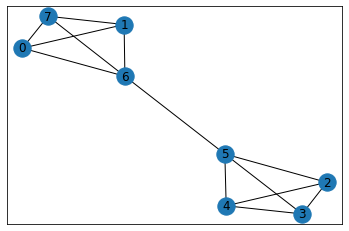

In [304]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=0)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=1)

# G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

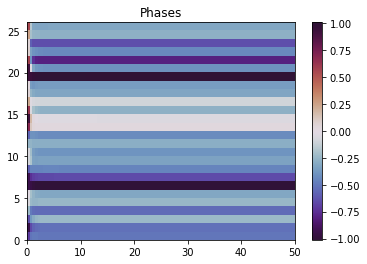

In [305]:
# np.random.seed(4444)
initial_phase = np.random.uniform(0, 1, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

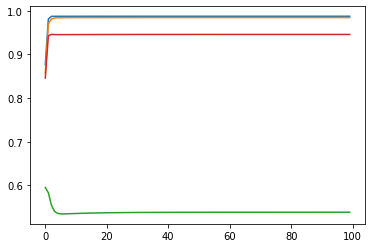

In [306]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','1','2','tot'])
plt.show

## Two cliques one hole

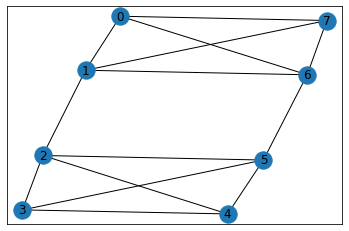

In [98]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=2)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=2)

G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

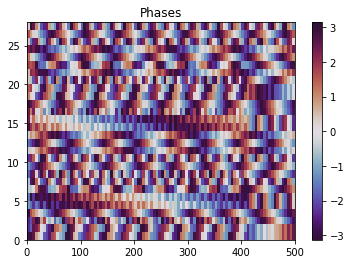

In [104]:
# np.random.seed(4444)
initial_phase = np.random.uniform(0, np.pi, Gsc.n_edges)
# initial_phase = np.random.normal(0, 0.2, Gsc.n_edges)

t_max = 500
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0.1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

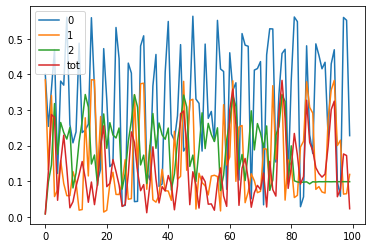

In [105]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','1','2','tot'])
plt.show

14.624680469461769
[-0.59875003 -0.77017958  0.92497218  0.07181473  2.16902762  0.87480961
  1.87246891  0.53559562 -0.55733314  1.14500376  0.81921916  0.15334139
  0.90701249 -2.28053173 -0.03865523]
(15,)


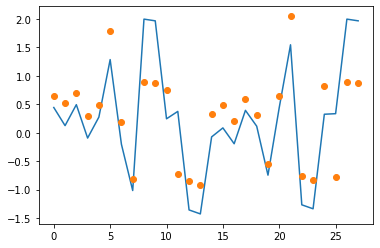

In [103]:
theta=np.round(edge_result.y[:,-1] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('observed state','reconstructed in null-space')
plt.show()

In [ ]:
plt.figure()

In [72]:
print(Gsc.lifted_L1.dot(edge_result.y[:,-10]))
print(Gsc.L1.dot(edge_result.y[0:14:,-1]))
print(Gsc.V.T.dot(Gsc.lifted_L1.dot(Gsc.V)).dot(edge_result.y[0:14:,-10]))
print()

[-4.77222671e-11 -7.31359417e-15 -4.77923812e-11  4.77119282e-11
 -7.06448788e-14 -1.55574302e-10  4.77823128e-11  1.55785149e-10
 -4.75410232e-11 -4.62493377e-11 -2.81233370e-13  1.24744659e-12
  4.75298689e-11  4.63379335e-11  4.77206608e-11  4.55191440e-15
  4.77908824e-11 -4.77134270e-11  7.04054870e-14  1.55574302e-10
 -4.77837353e-11 -1.55785149e-10  4.76687023e-11  4.64102090e-11
  5.99253286e-13 -1.24378285e-12 -4.73689699e-11 -4.61437277e-11]
[-0.32847431 -0.40877334 -0.32307164 -0.15122806 -0.06552636  0.50750467
 -0.13502004  0.11036087 -0.52960609 -0.54612308 -0.89999941  0.5098557
  0.15597937  0.10642839]
[-0.65694862 -0.81754669 -0.64614327 -0.30245613 -0.13105271  1.01500935
 -0.27004007  0.22072174 -1.05921218 -1.09224616 -1.79999883  1.0197114
  0.31195873  0.21285679]


## No hole square

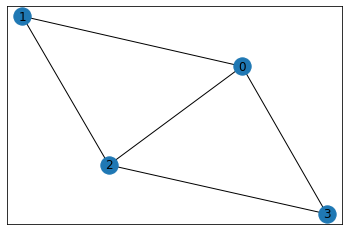

In [94]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)
G.add_edge(0,2,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

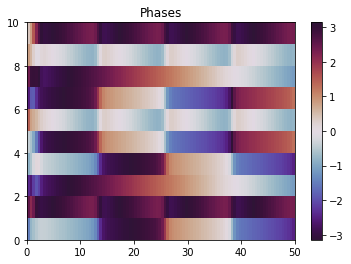

In [95]:
initial_phase = np.random.uniform(0, 1, Gsc.n_edges)
initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0.1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

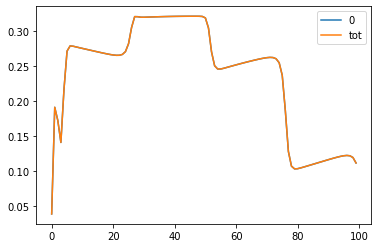

In [96]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

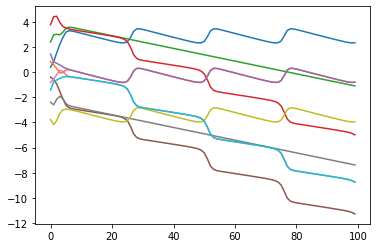

In [97]:
plt.figure()
plt.plot(edge_result.y[:,:].T)
# plt.plot(edge_result.y[7,:].T)
plt.show()

## One hole square

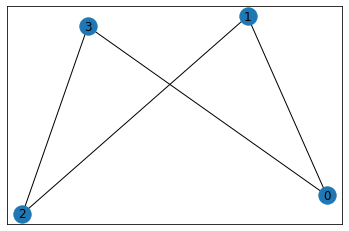

In [26]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,3,4).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

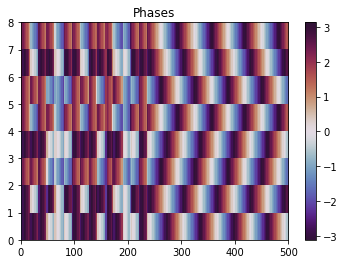

In [27]:
initial_phase = np.random.uniform(2, 2.1, Gsc.n_edges)
# initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 500
n_t = 200
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0.1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

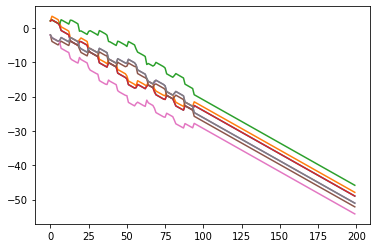

In [28]:
plt.figure()
plt.plot(edge_result.y[:,:].T)
# plt.plot(edge_result.y[7,:].T)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

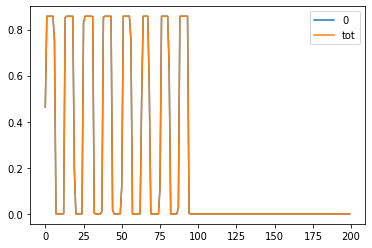

In [29]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

nan


/Users/paulexpert/Desktop/Imperial/Projects/Laplacian_Temporal/Kuramoto/Code/Github/Kuramoto/simplicial_kuramoto/plotting.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ce = -(coalition_prob*np.log2(coalition_prob)).sum()/M


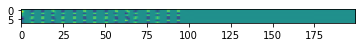

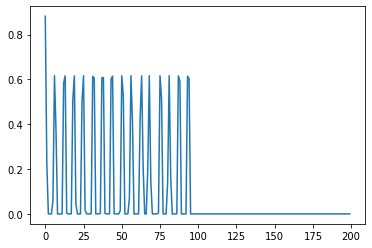

In [30]:
gop, phase_gradient = module_gradient_parameter(edge_result.y, np.hstack([edge_community_assignment,edge_community_assignment]))
plt.imshow(phase_gradient)
plt.figure()
plt.plot(gop.T)
plt.show

print(coalition_entropy(gop))

0.02000000000000199
[ 1.8439795  -2.43567354 -2.11549241  1.33261456 -3.67920761]
(5,)


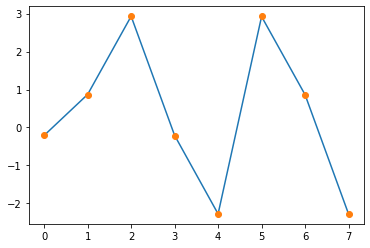

143.7168146928205
[-47.9388993]
(1,)


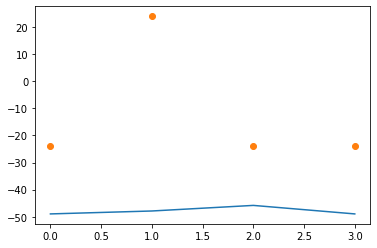

In [31]:
theta=np.round(edge_result.y[:,-20] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('observed state','reconstructed in null-space')
plt.show()

theta=edge_result.y[0:4,-1]
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
plt.show()

In [82]:
print(Gsc.lifted_L1.dot(edge_result.y[:,-10]))
print(Gsc.L1.dot(edge_result.y[0:4:,-10]))
print(Gsc.V.T.dot(Gsc.lifted_L1.dot(Gsc.V)).dot(edge_result.y[0:4:,-10]))

[-1.21915456e-08  1.56472966e-08  1.56463852e-08  1.21924569e-08
  1.21915456e-08 -1.56472966e-08 -1.56463852e-08 -1.21924569e-08]
[-1.21915456e-08  1.56472966e-08  1.56463852e-08  1.21924569e-08]
[-2.43830911e-08  3.12945933e-08  3.12927705e-08  2.43849139e-08]


[ 4.00000000e+00 -2.22044605e-16  2.00000000e+00  2.00000000e+00]


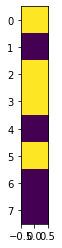

[ 4.00000000e+00+0.00000000e+00j -1.43131458e-16+3.53197304e-16j
 -1.43131458e-16-3.53197304e-16j  2.00000000e+00+0.00000000e+00j
  2.00000000e+00+0.00000000e+00j  2.45553755e-16+0.00000000e+00j
 -1.23319933e-16+8.66870332e-17j -1.23319933e-16-8.66870332e-17j]


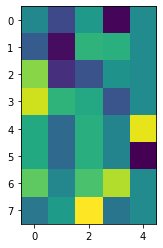

In [84]:
print(np.linalg.eigvals(Gsc.L1.todense()))

plt.figure()
plt.imshow(Gsc.V.dot(sc.linalg.null_space(Gsc.L1.todense())))
plt.show()

print(np.linalg.eigvals(Gsc.lifted_L1.todense()))

plt.figure()
plt.imshow(np.real(sc.linalg.null_space(Gsc.lifted_L1.todense())))
plt.title('')
plt.show()

## Hexagone

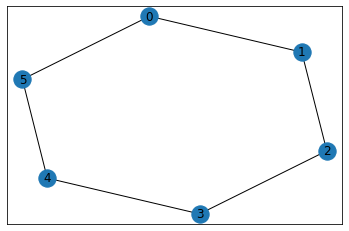

In [33]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=1)
G.add_edge(2,3,weight=1,edge_com=2)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(5,0,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

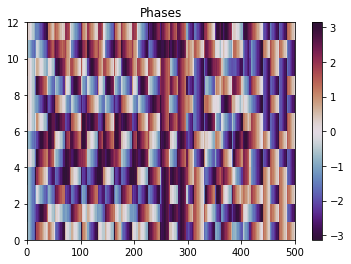

In [34]:
initial_phase = np.random.uniform(0, 1, Gsc.n_edges)
# initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 500
n_t = 200
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0.1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

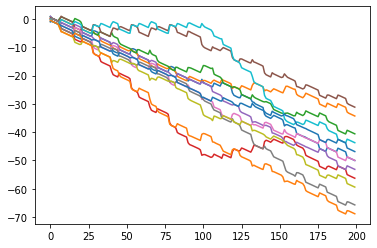

In [35]:
plt.figure()
plt.plot(edge_result.y[:,:].T)
# plt.plot(edge_result.y[7,:].T)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

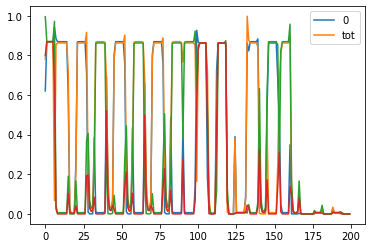

In [36]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

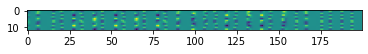

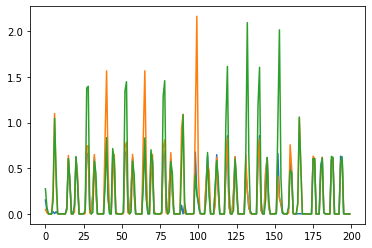

In [37]:
gop, phase_gradient = module_gradient_parameter(edge_result.y, np.hstack([edge_community_assignment,edge_community_assignment]))
plt.imshow(phase_gradient)
plt.figure()
plt.plot(gop.T)
plt.show

0.04607456205166316
[-2.42715209 -0.42902905  0.73406538  6.15867698 -0.63479942 -0.3663827
 -2.24409486]
(7,)


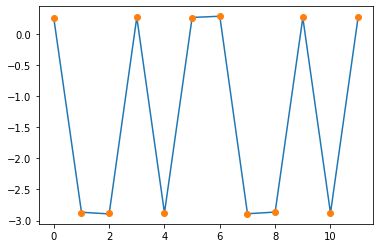

In [38]:
theta=np.round(edge_result.y[:,-1] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('observed state','reconstructed in null-space')
plt.show()

## Little house

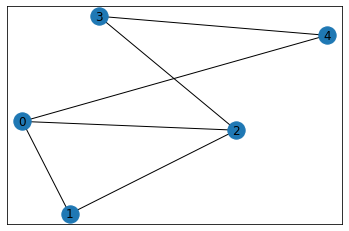

In [86]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,0,weight=1,edge_com=0)
# G.add_edge(5,0,weight=1,edge_com=0)

G.add_edge(2,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

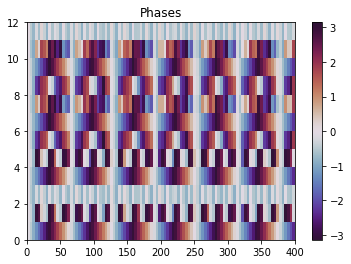

In [92]:
initial_phase = np.random.uniform(0, 0.1, Gsc.n_edges)
# initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 400
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0.1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

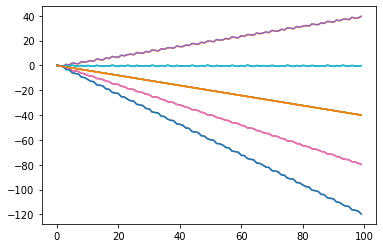

In [93]:
plt.figure()
plt.plot(edge_result.y[:,:].T)
# plt.plot(edge_result.y[7,:].T)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

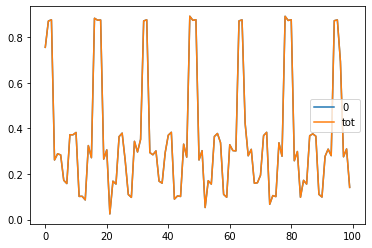

In [89]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

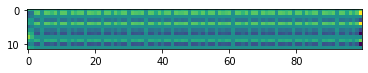

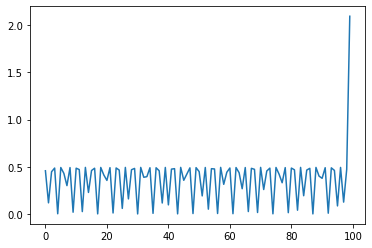

In [90]:
gop, phase_gradient = module_gradient_parameter(edge_result.y, np.hstack([edge_community_assignment,edge_community_assignment]))
plt.imshow(phase_gradient)
plt.figure()
plt.plot(gop.T)
plt.show

3.157646761183462
[ 0.68695996 -0.63299994 -0.12932768  0.37883175 -0.67376978 -0.24220165
 -0.14438387]
(7,)


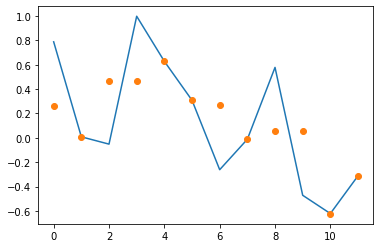

In [85]:
theta=np.round(edge_result.y[:,-1] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('observed state','reconstructed in null-space')
plt.show()